In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data=pd.read_csv(r"C:\Users\DELL\Downloads\Iris_1.csv")

In [14]:
data

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [15]:
d=data.copy()

In [16]:
d

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [17]:
d.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [18]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sepal length   150 non-null    float64
 1   sepal width    150 non-null    float64
 2    petal length  150 non-null    float64
 3   petal width    150 non-null    float64
 4   class          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [19]:
d.columns

Index(['sepal length', 'sepal width', ' petal length', 'petal width', 'class'], dtype='object')

In [20]:
d=d.replace(to_replace={'class':{'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}})
d.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
d['class'] = d['class'].astype('category').cat.codes

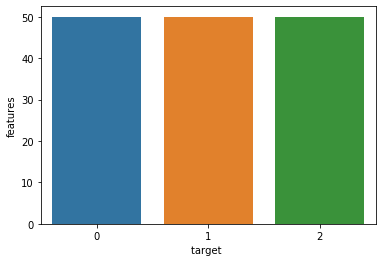

In [28]:
sns.countplot(x=d['class'],data=d)
plt.xlabel('target ')
plt.ylabel('features')
plt.show()

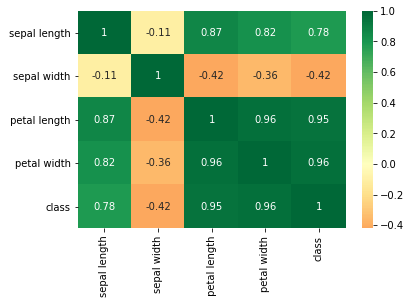

In [29]:
sns.heatmap(d.corr(),annot=True,cmap='RdYlGn',center=0)

In [30]:
X = d.drop(['class'], axis =1)
y = d['class']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [33]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [34]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(multi_class='multinomial',solver='lbfgs')
reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
y_pred = reg.predict(X_test)
y_proba = reg.predict_proba(X_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0], dtype=int8)

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix,accuracy_score

In [37]:
actual=y_test
predicted=y_pred
results=confusion_matrix(actual,predicted)
print('confusion matrix')
print(results)

confusion matrix
[[16  0  0]
 [ 0 16  2]
 [ 0  0 11]]


In [38]:
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1.0, random_state=0)
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [39]:
print ("Train - Accuracy :", accuracy_score(y_train, clf.predict(X_train)))
print ("Train - Confusion matrix :\n",confusion_matrix(y_train, clf.
predict(X_train)))

Train - Accuracy : 0.9714285714285714
Train - Confusion matrix :
 [[34  0  0]
 [ 0 30  2]
 [ 0  1 38]]


In [40]:
print ("Test - Accuracy :", accuracy_score(y_test, clf.predict
(X_test)))
print ("Test - Confusion matrix :\n",confusion_matrix(y_test, clf.
predict(X_test)))

Test - Accuracy : 0.9333333333333333
Test - Confusion matrix :
 [[16  0  0]
 [ 0 15  3]
 [ 0  0 11]]


In [41]:
n=[[6.9,2.9,4.5,2.3]]
n

[[6.9, 2.9, 4.5, 2.3]]

In [42]:
n=sc.fit_transform(n)

In [ ]:
s=clf.predict(num)
s[0]